In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from io import BytesIO

import pandas as pd
import matplotlib.pyplot as plt

from data_collector import Omie

In [25]:
filename = "curva_pbc"
date = "20211001"

date = pd.to_datetime(date).strftime("%Y%m%d")
filename_date = f"{filename}_{date}.1"

cols = [
    "hour", "date", "country", "unit", "offer_type", "energy", "price", "status"
]

In [26]:
content = Omie._download_content(family_file=filename, filename=filename_date)

In [27]:
filebytes = BytesIO(content)

In [28]:
df = pd.read_csv(filebytes, delimiter=";", index_col=False, skiprows=3, names=cols, encoding="latin-1")
df.drop(["unit"], axis=1, inplace=True)
df.dropna(inplace=True)

df["price"] = df["price"].str.replace(".", "").str.replace(",", ".").astype(float)
df["energy"] = df["energy"].str.replace(".", "").str.replace(",", ".").astype(float)

/tmp/ipykernel_149250/2750738852.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["price"] = df["price"].str.replace(".", "").str.replace(",", ".").astype(float)
/tmp/ipykernel_149250/2750738852.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["energy"] = df["energy"].str.replace(".", "").str.replace(",", ".").astype(float)


In [29]:
df_1 = df[df["hour"] == 1]

In [30]:
df_offer = df_1[(df_1["offer_type"] == "V") & (df_1["status"] == "O")].sort_values("price")
df_offer["agg_energy"] = df_offer["energy"].cumsum() 

In [31]:
df_demand = df_1[(df_1["offer_type"] == "C") & (df_1["status"] == "O")].sort_values("price", ascending=False)
df_demand["agg_energy"] = df_demand["energy"].cumsum()

(-10.0, 300.0)

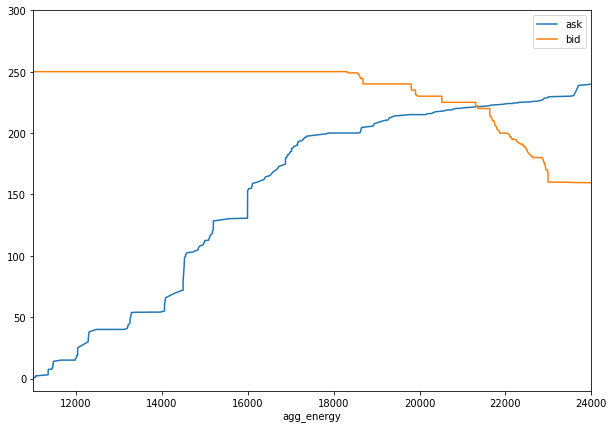

In [40]:
fig, ax = plt.subplots(figsize=(10, 7))
df_offer.plot(x="agg_energy", y="price", ax=ax, label="ask")
df_demand.plot(x="agg_energy", y="price", ax=ax, label="bid")
ax.set_xlim(11000, 24000)
ax.set_ylim(-10, 300)

In [41]:
df_units = pd.read_csv("curva_pbc_uof_20211001.1", delimiter=";", index_col=False, skiprows=3, encoding="latin-1",
                      names=cols)
df_units.dropna(inplace=True)

df_units["price"] = df_units["price"].str.replace(".", "").str.replace(",", ".").astype(float)
df_units["energy"] = df_units["energy"].str.replace(".", "").str.replace(",", ".").astype(float)

/tmp/ipykernel_149250/3279902346.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_units["price"] = df_units["price"].str.replace(".", "").str.replace(",", ".").astype(float)
/tmp/ipykernel_149250/3279902346.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_units["energy"] = df_units["energy"].str.replace(".", "").str.replace(",", ".").astype(float)


In [42]:
df_units_offer = df_units[
    (df_units["hour"] == 1) & (df_units["offer_type"] == "V") & (df_units["status"] == "O")
].sort_values("price")

In [43]:
df_offer

,hour,date,country,offer_type,energy,price,status,agg_energy
597,1.0,01/10/2021,MI,V,45.5,-300.0,O,45.5
598,1.0,01/10/2021,MI,V,28.8,-60.0,O,74.3
619,1.0,01/10/2021,MI,V,4.1,-30.0,O,78.4
618,1.0,01/10/2021,MI,V,1.5,-30.0,O,79.9
617,1.0,01/10/2021,MI,V,6.7,-30.0,O,86.6
...,...,...,...,...,...,...,...,...
1824,1.0,01/10/2021,MI,V,0.1,3000.0,O,49023.1
1825,1.0,01/10/2021,MI,V,0.1,3000.0,O,49023.2
1826,1.0,01/10/2021,MI,V,0.1,3000.0,O,49023.3
1827,1.0,01/10/2021,MI,V,0.1,3000.0,O,49023.4


In [45]:
df_units_offer.head(50)

,hour,date,country,unit,offer_type,energy,price,status
597,1.0,01/10/2021,MI,CEVD025,V,45.5,-300.0,O
598,1.0,01/10/2021,MI,GEFGV1,V,28.8,-60.0,O
619,1.0,01/10/2021,MI,AMRE009,V,4.1,-30.0,O
618,1.0,01/10/2021,MI,AMRE011,V,1.5,-30.0,O
617,1.0,01/10/2021,MI,AMRE010,V,6.7,-30.0,O
616,1.0,01/10/2021,MI,AMRE008,V,9.3,-30.0,O
615,1.0,01/10/2021,MI,AMRE035,V,0.5,-30.0,O
614,1.0,01/10/2021,MI,AMRE036,V,3.4,-30.0,O
612,1.0,01/10/2021,MI,AMRE033,V,1.4,-30.0,O
611,1.0,01/10/2021,MI,EFGVD11,V,0.1,-30.0,O
